<a href="https://colab.research.google.com/github/NSR-Ribeiro/Semana_IA/blob/master/projeto_senai_cancer_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto final do curso
- Problema?
- Desenvolver um sistema em Flask e criar um modelo de aprendizado de maquina com base nos datasets de cancer e infarto encontrados no Kaggle capaz de prever infartos e cancer de mama

In [ ]:
import pandas as pd

In [ ]:
url='https://raw.githubusercontent.com/ThiagoDFMaia/meusdatasets/refs/heads/main/cancer_mama.csv'

In [ ]:
df=pd.read_csv(url)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.drop(columns = "id")

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
corr = df.corr()

In [ ]:
corr['diagnosis']

,diagnosis
diagnosis,1.000000
radius_mean,0.730029
texture_mean,0.415185
perimeter_mean,0.742636
area_mean,0.708984
smoothness_mean,0.358560
compactness_mean,0.596534
concavity_mean,0.696360
concave points_mean,0.776614
symmetry_mean,0.330499


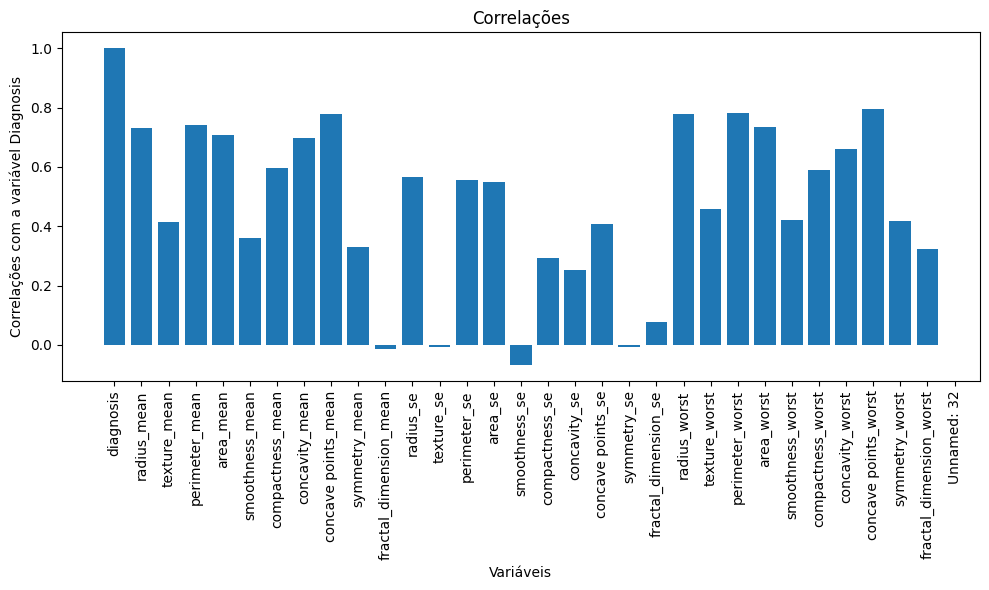

In [ ]:
# prompt: pode gerar um grafico de barras dos dados na variavel corr?

import matplotlib.pyplot as plt

# Selecionar apenas a coluna 'diagnosis' da matriz de correlação
corr_diagnosis = corr['diagnosis']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar o tamanho do gráfico
plt.bar(corr_diagnosis.index, corr_diagnosis.values)
plt.xlabel('Variáveis')
plt.ylabel('Correlações com a variável Diagnosis')
plt.title('Correlações')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar o layout do gráfico para evitar sobreposições
plt.show()

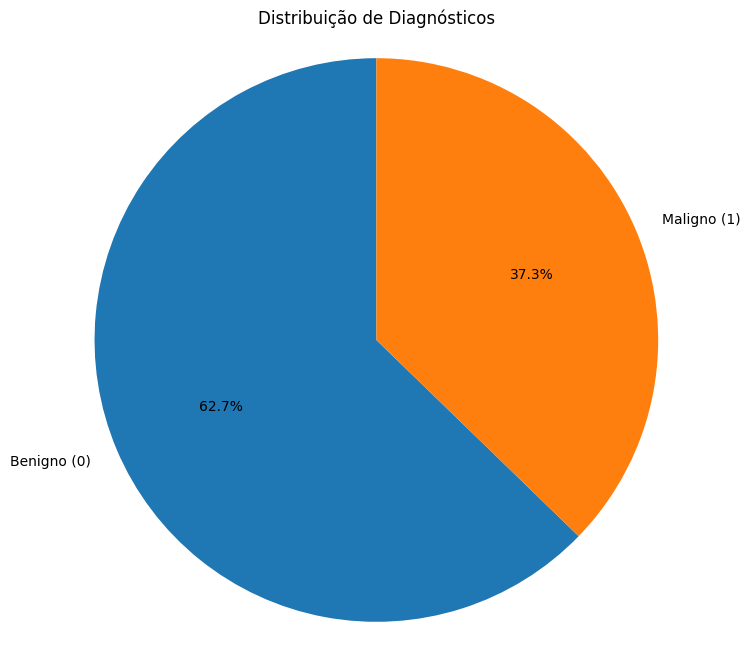

In [ ]:
# prompt: pode gerar um grafico pizza da coluna diagnosis em % de quantos 0 e 1

import pandas as pd
import matplotlib.pyplot as plt

# ... (código anterior) ...

# Contar a quantidade de 0 e 1 na coluna 'diagnosis'
diagnosis_counts = df['diagnosis'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_counts, labels=['Benigno (0)', 'Maligno (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Diagnósticos')
plt.axis('equal')  # Assegura que o gráfico seja um círculo
plt.show()

In [ ]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


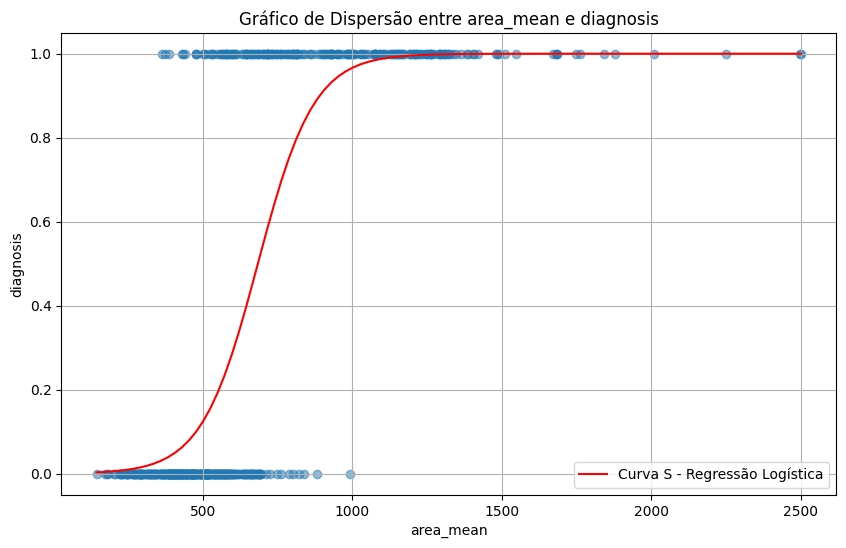

In [ ]:
# prompt: pode gerar um grafico de dispersao entre a coluna diagnosis e a area_mean	 mas queria que mostrasse a curva S do modelo de regressao linear
# tem como mostrar as linhas de grades

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# # Projeto final do curso
# - Problema?
# - Desenvolver um sistema em Flask e criar um modelo de aprendizado de maquina com base nos datasets de cancer e infarto encontrados no Kaggle capaz de prever infartos e cancer de mama
url='https://raw.githubusercontent.com/ThiagoDFMaia/meusdatasets/refs/heads/main/cancer_mama.csv'
df=pd.read_csv(url)

df = df.drop(columns = "id")
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
corr = df.corr()
corr['area_mean']


# Separando os dados em variáveis independentes (X) e dependente (y)
X = df[['area_mean']]
y = df['diagnosis']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Treinando o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo previsões com o modelo treinado
y_pred = model.predict(X_test)

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['area_mean'], df['diagnosis'], alpha=0.5)
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
plt.title('Gráfico de Dispersão entre area_mean e diagnosis')

# Adicionando a curva S do modelo de regressão logística
x_plot = np.linspace(df['area_mean'].min(), df['area_mean'].max(), 100).reshape(-1, 1)
y_plot = model.predict_proba(x_plot)[:, 1]
plt.plot(x_plot, y_plot, color='red', label='Curva S - Regressão Logística')

# Adicionando linhas de grade
plt.grid(True)

# Adicionando legenda
plt.legend()

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier  # Importação necessária
from sklearn.metrics import accuracy_score, confusion_matrix  # Certifique-se de importar o confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
classe = df['diagnosis']

In [ ]:
df = df.drop(columns = 'diagnosis')

In [ ]:
df=df.drop(columns='Unnamed: 32')

# Random Forest

In [ ]:
x_test, x_train, y_test, y_train = train_test_split(df, classe, test_size=0.3, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Alinhar as colunas de X_test com X_train
x_test = x_test[x_train.columns]


In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Acurácia do modelo: {accuracy:.4f}")
print("Matriz de confusão:")
print(conf_matrix)

Acurácia do modelo: 0.9296
Matriz de confusão:
[[235  14]
 [ 14 135]]


In [ ]:
# Garantir que as colunas de X_test estão na mesma ordem que as de X_train
x_test = x_test[x_train.columns]


In [ ]:

# Ajustando o encoder no conjunto de treino
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train)

# Transformando o conjunto de teste com o mesmo encoder
x_test_encoded = encoder.transform(x_test)

# Treinando o modelo com os dados codificados
model.fit(x_train_encoded, y_train)

# Fazendo previsões com o conjunto de teste codificado
y_pred = model.predict(x_test_encoded)


In [ ]:



acuracia_teste = accuracy_score(y_test, y_pred)
print(f"Acurácia de teste do modelo: {(acuracia_teste*100):.2f}%")

Acurácia de teste do modelo: 62.56%


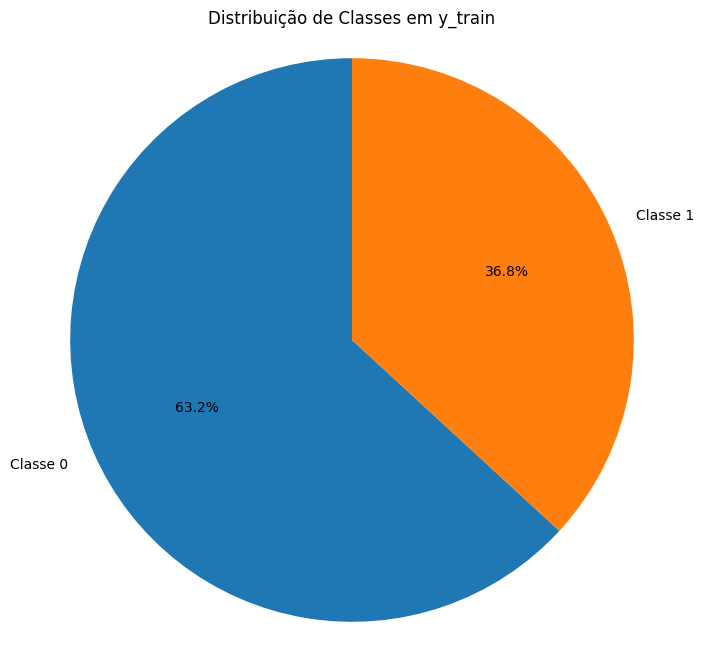

In [ ]:
# prompt: pode gerar um grafico de pizza usando y_train de quantos 0 e 1 em %

# Contar a quantidade de 0 e 1 em y_train
y_train_counts = y_train.value_counts()

# Calcular a porcentagem de cada classe
y_train_percentages = (y_train_counts / len(y_train)) * 100

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(y_train_percentages, labels=['Classe 0', 'Classe 1'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Classes em y_train')
plt.axis('equal')  # Assegura que o gráfico seja um círculo
plt.show()

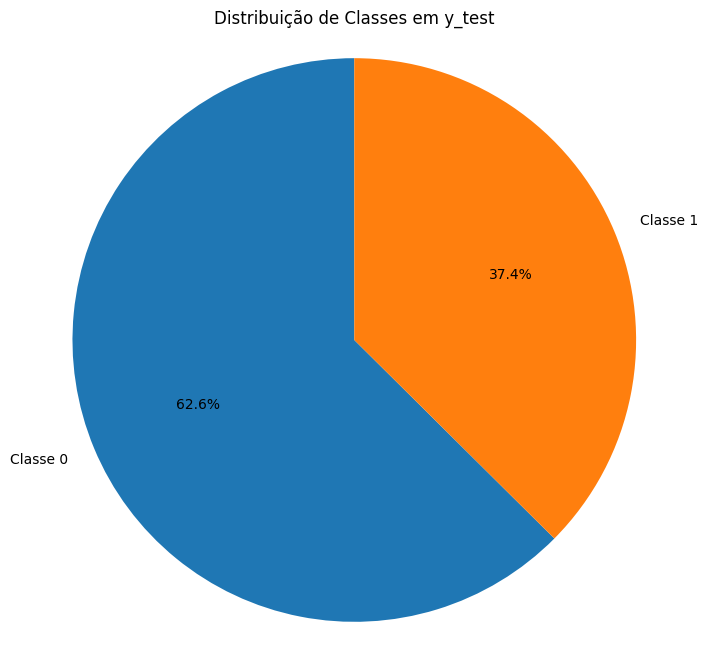

In [ ]:
# prompt: pode gerar um grafico de pizza usando y_test de quantos 0 e 1 em %

# Contar a quantidade de 0 e 1 em y_test
y_test_counts = y_test.value_counts()

# Calcular a porcentagem de cada classe
y_test_percentages = (y_test_counts / len(y_test)) * 100

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(y_test_percentages, labels=['Classe 0', 'Classe 1'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Classes em y_test')
plt.axis('equal')  # Assegura que o gráfico seja um círculo
plt.show()

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test.head(20)

,diagnosis
149,0
124,0
421,0
195,0
545,0
261,1
227,0
399,0
453,0
523,0


In [ ]:
x_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
124,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.26,22.75,91.99,632.1,0.10250,0.2531,0.3308,0.08978,0.2048,0.07628
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949
545,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.35,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953


In [ ]:
teste=x_test.head(1)

In [ ]:
teste

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.0558,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.235,0.07014


In [ ]:
type(teste)

pandas.core.frame.DataFrame

In [ ]:
dados_teste = {
    'radius_mean': 9.029,
    'texture_mean': 17.33,
    'perimeter_mean': 115.0,
    'area_mean': 40.0,
    'smoothness_mean': 0.1,
    'compactness_mean': 0.2,
    'concavity_mean': 0.25,
    'concave points_mean': 0.15,
    'symmetry_mean': 0.18,
    'fractal_dimension_mean': 0.06,
    'radius_se': 0.6,
    'texture_se': 1.2,
    'perimeter_se': 5.5,
    'area_se': 40.0,
    'smoothness_se': 0.007,
    'compactness_se': 0.025,
    'concavity_se': 0.03,
    'concave points_se': 0.01,
    'symmetry_se': 0.02,
    'fractal_dimension_se': 0.003,
    'radius_worst': 25.0,
    'texture_worst': 25.5,
    'perimeter_worst': 150.0,
    'area_worst': 1200.0,
    'smoothness_worst': 0.15,
    'compactness_worst': 0.35,
    'concavity_worst': 0.4,
    'concave points_worst': 0.2,
    'symmetry_worst': 0.3,
    'fractal_dimension_worst': 0.08
}


In [ ]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Ajusta no conjunto de treino
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Aplica a transformação no conjunto de teste
x_test_scaled = scaler.transform(x_test)

# Treina o modelo com os dados escalonados
model.fit(x_train_scaled, y_train)

# Faz previsões com os dados escalonados de teste
y_pred = model.predict(x_test_scaled)


In [ ]:
probabilidades = model.predict_proba(x_test)

classes_previstas = model.predict(x_test)

confianças = [max(prob) * 100 for prob in probabilidades]  # Converte para porcentagem

for i, (classe, confiança) in enumerate(zip(classes_previstas, confianças)):
    print(f"Previsão para amostra {i}: Classe {classe} com {confiança:.2f}% de confiança")

Previsão para amostra 0: Classe 1 com 100.00% de confiança
Previsão para amostra 1: Classe 1 com 100.00% de confiança
Previsão para amostra 2: Classe 1 com 100.00% de confiança
Previsão para amostra 3: Classe 1 com 100.00% de confiança
Previsão para amostra 4: Classe 1 com 100.00% de confiança
Previsão para amostra 5: Classe 1 com 100.00% de confiança
Previsão para amostra 6: Classe 1 com 100.00% de confiança
Previsão para amostra 7: Classe 1 com 100.00% de confiança
Previsão para amostra 8: Classe 1 com 100.00% de confiança
Previsão para amostra 9: Classe 1 com 100.00% de confiança
Previsão para amostra 10: Classe 1 com 100.00% de confiança
Previsão para amostra 11: Classe 1 com 100.00% de confiança
Previsão para amostra 12: Classe 1 com 100.00% de confiança
Previsão para amostra 13: Classe 1 com 100.00% de confiança
Previsão para amostra 14: Classe 1 com 100.00% de confiança
Previsão para amostra 15: Classe 1 com 100.00% de confiança
Previsão para amostra 16: Classe 1 com 100.00% de 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

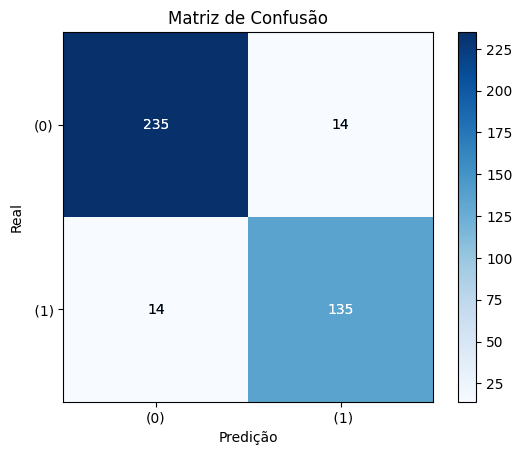

Matriz de Confusão:
 [[235  14]
 [ 14 135]]


In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definir os rótulos
labels = ['(0)', ' (1)']

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

# Adicionar anotações à matriz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

# Mostrar a matriz de confusão em forma de array
print("Matriz de Confusão:\n", cm)


In [ ]:
from sklearn.metrics import classification_report

print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       249
           1       0.99      0.94      0.96       149

    accuracy                           0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



In [ ]:
vp=269
fn=17
fp=15
vn=154

In [ ]:
precisao = vp/(vp+fp)
print(f"{precisao:.3f}")


0.947


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
prob_previsao = model.predict_log_proba(x_test)[:,1]
# curva
tfp,tvp,limite = roc_curve(y_test,prob_previsao)
# área
print('roc_auc',roc_auc_score(y_test,prob_previsao))

roc_auc 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1461: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


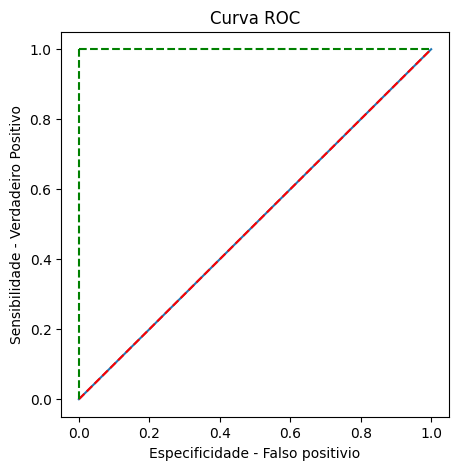

In [ ]:
plt.subplots(1, figsize=(5,5))
# cria um título
plt.title('Curva ROC')
# criar o gráfico (plotar)
plt.plot(tfp,tvp)
# criar o título x
plt.xlabel('Especificidade - Falso positivio')
plt.ylabel('Sensibilidade - Verdadeiro Positivo')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

In [ ]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:

url='https://raw.githubusercontent.com/ThiagoDFMaia/meusdatasets/refs/heads/main/cancer_mama.csv'
df=pd.read_csv(url)

df = df.drop(columns = "id")
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
corr = df.corr()
corr['area_mean']


# Separando os dados em variáveis independentes (X) e dependente (y)
X = df[['area_mean']]
y = df['diagnosis']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Treinando o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões com o modelo treinado
y_pred = model.predict(X_test)

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['area_mean'], df['diagnosis'], alpha=0.5)
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
plt.title('Gráfico de Dispersão entre area_mean e diagnosis')

# Adicionando a curva S do modelo de regressão logística
x_plot = np.linspace(df['area_mean'].min(), df['area_mean'].max(), 100).reshape(-1, 1)
y_plot = model.predict_proba(x_plot)[:, 1]
plt.plot(x_plot, y_plot, color='red', label='Curva S - Regressão Logística')

# Adicionando linhas de grade
plt.grid(True)

# Adicionando legenda
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but LogisticRegression is expecting 30 features as input.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Carregar os dados
url = 'https://raw.githubusercontent.com/ThiagoDFMaia/meusdatasets/refs/heads/main/cancer_mama.csv'
df = pd.read_csv(url)

# Preparar os dados
df = df.drop(columns="id")
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separando os dados em variáveis independentes (X) e dependente (y)
X = df[['area_mean']]
y = df['diagnosis']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Treinando o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões com o modelo treinado
y_pred = modelo.predict(X_test)

# Criando o gráfico de dispersão com jitter
plt.figure(figsize=(10, 6))
sns.stripplot(x='area_mean', y='diagnosis', data=df, alpha=0.5, jitter=True, color='blue')

# Adicionando a curva S do modelo de regressão logística
x_plot = np.linspace(df['area_mean'].min(), df['area_mean'].max(), 100).reshape(-1, 1)
y_plot = modelo.predict_proba(x_plot)[:, 1]
plt.plot(x_plot, y_plot, color='red', label='Curva S - Regressão Logística')

# Adicionando linhas de grade
plt.grid(True)

# Adicionando rótulos e título
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
plt.title('Gráfico de Dispersão com Jitter entre area_mean e diagnosis')

# Adicionando legenda
plt.legend()

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Carregar os dados
url = 'https://raw.githubusercontent.com/ThiagoDFMaia/meusdatasets/refs/heads/main/cancer_mama.csv'
df = pd.read_csv(url)

# Preparar os dados
df = df.drop(columns="id")
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separando os dados em variáveis independentes (X) e dependente (y)
X = df[['area_mean']]
y = df['diagnosis']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Treinando o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões com o modelo treinado
y_pred = modelo.predict(X_test)

# Criando o gráfico de dispersão com jitter
plt.figure(figsize=(10, 6))
sns.stripplot(x='area_mean', y='diagnosis', data=df, alpha=0.5, jitter=True, color='blue')

# Adicionando a curva S do modelo de regressão logística
x_plot = np.linspace(df['area_mean'].min(), df['area_mean'].max(), 100).reshape(-1, 1)
y_plot = modelo.predict_proba(x_plot)[:, 1]
plt.plot(x_plot, y_plot, color='red', label='Curva S - Regressão Logística')

# Ajustando o limite do eixo y
plt.ylim(-0.1, 1.1)  # Ajusta o limite para mostrar apenas 0 e 1

# Adicionando linhas de grade
plt.grid(True)

# Adicionando rótulos e título
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
plt.title('Gráfico de Dispersão com Jitter entre area_mean e diagnosis')

# Adicionando legenda
plt.legend()

plt.show()


In [ ]:
# Gerando o pairplot
sns.pairplot(df)
plt.show()